In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv('datasets/dataset_train.csv').sample(frac=1, random_state=42)

In [225]:
X = df[['Ancient Runes', 'Herbology', 'Defense Against the Dark Arts']]
for col in X.columns:
	X[col].fillna((X[col].mean()), inplace=True)
Y = df['Hogwarts House']

/Users/benjamin/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [226]:
X_train = X.iloc[:int(len(X)*0.8), :]
Y_train = Y.iloc[:int(len(Y)*0.8)]
X_test = X.iloc[int(len(X)*0.8):, :]
Y_test = Y.iloc[int(len(Y)*0.8):]

In [227]:
class dslr:

	def __init__(self):
		# No specific initialization needed
		pass

	def fit(self, X, y, batch_size=64, lr=0.1, max_iter=100):
		# Standard scaling of the training data
		X = self.scale_(X)
		# Adding an intercept unit
		X = self.fit_intercept_(X)
		# Getting all unique classes
		self.classes_ = np.unique(y)
		# Converting str labels into int
		self.class_labels_ = {c: i for i, c in enumerate(self.classes_)}
		# Applying one-hot encoding
		Y = self.one_hot_encoding_(y)
		# Initializing loss list to plot and monitor through training
		self.loss_ = []
		# Initializing weights to 0
		self.W_ = np.zeros((len(self.classes_), X.shape[1]))
		# Going through epochs
		for i in range(max_iter):
			# Calculating loss
			self.loss_.append(self.cross_entropy_(Y, self.predict_(X)))
			# Getting a random slice of the training set
			idx = np.random.choice(X.shape[0], batch_size)
			X_batch, Y_batch = X[idx], Y[idx]
			# Calculating the error
			error = Y_batch - self.predict_(X_batch)
			# Updating the weights
			self.W_ += lr * np.dot(error.T, X_batch)
	
	def scale_(self, X):
		self.means_ = []
		self.std_ = []
		# Standard scaling for each feature
		for i in range(X.shape[1]):
			# Recording the means and standard deviations to use them for the scaling of predictive sets
			self.means_.append(np.mean(X.iloc[:, i]))
			self.std_.append(np.std(X.iloc[:, i]))
			# Scaling
			X.iloc[:, i] = (X.iloc[:, i] - np.mean(X.iloc[:, i])) / np.std(X.iloc[:, i])
		return X
	
	def fit_intercept_(self, X):
		# Adding an intercept unit
		return np.hstack((np.ones((X.shape[0], 1)), X))
	
	def one_hot_encoding_(self, y):
		# Creating an empty matrix
		Y = np.zeros((len(y), len(np.unique(y))))
		for i in range(len(np.unique(y))):
			# Adding 1s to columns
			Y[:, i] = np.multiply(y == np.unique(y)[i], 1)
		return Y
	
	def cross_entropy_(self, y, y_pred):
		# Calculating the loss using the negative cross-entropy
		return - np.mean(y * np.log(y_pred))
	
	def predict_(self, X):
		# Predicting on unseen data
		return self.softmax_(np.dot(X, self.W_.T).reshape(-1, len(self.classes_)))
	
	def softmax_(self, z):
		# Activation function
		return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1, 1)

	def predict(self, X):
		# Scaling new data using recorded means and standard deviations
		for i in range(X.shape[1]):
			X.iloc[:, i] = (X.iloc[:, i] - self.means_[i]) / self.std_[i]
		# Calculating probabilities for each class
		probs = self.predict_(self.fit_intercept_(X))
		# Getting the maximum probability for each instance
		max_prob = np.argmax(probs, axis=1)
		predictions = []
		# Replacing by the initial labels
		for i in range(len(max_prob)):
			predictions.append(list(self.class_labels_.keys())[max_prob[i]])
		return predictions

	def plot_loss(self):
		# Plotting loss through epochs
		plt.plot(self.loss_)
		plt.xlabel('Epochs')
		plt.ylabel('Loss')

In [228]:
clf = dslr()

In [229]:
clf.fit(X_train, Y_train)

In [230]:
y_pred = clf.predict(X_test)

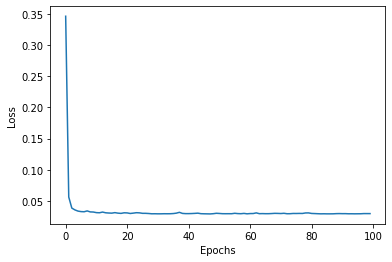

In [231]:
clf.plot_loss()

In [232]:
sum(y_pred == Y_test) / len(y_pred)

0.971875